In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [2]:
df = pd.read_csv('Dsata Set.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.drop('id',axis=1,inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df['diagnosis'].replace({'M':1, 'B':0}, inplace = True)

In [7]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             1
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             1
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 2
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df['radius_mean'].replace('', np.nan, inplace=True)
df.dropna(subset=['radius_mean'], inplace=True)
df['perimeter_mean'].replace('', np.nan, inplace=True)
df.dropna(subset=['perimeter_mean'], inplace=True)
df['concavity_mean'].replace('', np.nan, inplace=True)
df.dropna(subset=['concavity_mean'], inplace=True)
df['compactness_se'].replace('', np.nan, inplace=True)
df.dropna(subset=['compactness_se'], inplace=True)
df['area_worst'].replace('', np.nan, inplace=True)
df.dropna(subset=['area_worst'], inplace=True)
df['concavity_worst'].replace('', np.nan, inplace=True)
df.dropna(subset=['concavity_worst'], inplace=True)

In [10]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# FLDM1

In [24]:
y=df[['diagnosis']]
X=df.loc[0:563,'radius_mean':]
X_train = X.loc[0:377]
X_test = X.loc[378:563].values
y_train = y.loc[0:377]
y_train = y_train['diagnosis']
y_test = y.loc[378:563]
y_test = y_test['diagnosis'].tolist()
X_test

array([[1.366e+01, 1.515e+01, 8.827e+01, ..., 1.054e-01, 3.387e-01,
        9.638e-02],
       [1.108e+01, 1.883e+01, 7.330e+01, ..., 2.524e-01, 4.154e-01,
        1.403e-01],
       [1.127e+01, 1.296e+01, 7.316e+01, ..., 1.318e-01, 3.343e-01,
        9.215e-02],
       ...,
       [1.120e+01, 2.937e+01, 7.067e+01, ..., 0.000e+00, 1.566e-01,
        5.905e-02],
       [1.522e+01, 3.062e+01, 1.034e+02, ..., 2.356e-01, 4.089e-01,
        1.409e-01],
       [2.092e+01, 2.509e+01, 1.430e+02, ..., 2.542e-01, 2.929e-01,
        9.873e-02]])

# FLDM 2

In [12]:
df['diagnosis_2'] = df['texture_mean']
df.drop('texture_mean',axis=1,inplace=True)
y=df[['diagnosis']]
X=df.loc[0:563,'radius_mean':]
X_train = X.loc[0:310]
X_test = X.loc[311:563].values
y_train = y.loc[0:310]
y_train = y_train['diagnosis']
y_test = y.loc[311:563]
y_test = y_test['diagnosis'].tolist()
X

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_2
0,17.99,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.26540,0.4601,0.11890,10.38
1,20.57,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902,17.77
2,19.69,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758,21.25
3,11.42,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.25750,0.6638,0.17300,20.38
4,20.29,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678,14.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,11.51,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,23.93
560,14.05,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,27.15
561,11.20,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,0.3141,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,29.37
562,15.22,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,0.2602,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,30.62


In [13]:
X.shape

(558, 30)

In [14]:
df.shape

(563, 31)

In [15]:
y.shape

(563, 1)

In [16]:
df

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_2
0,1,17.99,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,10.38
1,1,20.57,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,17.77
2,1,19.69,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,21.25
3,1,11.42,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,20.38
4,1,20.29,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,14.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,22.39
565,1,20.13,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,28.25
566,1,16.60,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,28.08
567,1,20.60,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,29.33


In [17]:
X0 = pd.DataFrame()
X1 = pd.DataFrame()
for i, row in df.iterrows():
    if(row['diagnosis'] == 0):
        X0 = X0.append(row, ignore_index=True)
    else:
        X1 = X1.append(row, ignore_index=True)
X1 = X1.drop(['diagnosis'], axis=1)
X0 = X0.drop(['diagnosis'], axis=1)
mean0 = X0.mean(axis=0)
mean1 = X1.mean(axis=0)
diff_means = mean0 - mean1
        
N = np.shape(X_train)[0]
        
sw0 = np.array((1 / N) * (X0 - X0.mean(axis=0)).T.dot(X0 - X0.mean(axis=0)))
sw1 = np.array((1 / N) * (X1 - X1.mean(axis=0)).T.dot(X1 - X1.mean(axis=0)))
sw = sw0 + sw1
        
w = np.linalg.pinv(sw).dot(diff_means)
w = w / np.linalg.norm(w)
print(w)
X_transformed0 = X0.dot(w)
X_transformed1 = X1.dot(w)
print(X_transformed0)
mean_transformed0 = X_transformed0.mean(axis=0)
mean_transformed1 = X_transformed1.mean(axis=0)

variation_transformed0 = np.var(X_transformed0)
variation_transformed1 = np.var(X_transformed1)
std_transformed1=np.sqrt(variation_transformed1)
std_transformed0=np.sqrt(variation_transformed0)
a = 1/(2*variation_transformed1) - 1/(2*variation_transformed0)
b = mean_transformed0/(variation_transformed0) - mean_transformed1/(variation_transformed1)
c = mean_transformed1**2 /(2*variation_transformed1) - mean_transformed0**2 / (2*variation_transformed0) + np.log(std_transformed1/std_transformed0)
D=np.sqrt(b**2-4*a*c)
root1=(-b+D)/(2*a)
root2=(-b-D)/(2*a)
r = [root1,root2]
if r[0] < max(mean_transformed0, mean_transformed1) and r[0] > min(mean_transformed0, mean_transformed1):
    thresh=r[0]
else:
    thresh = r[1]
print('The threshold is',thresh)   

C:\Users\SREETHEERDHA\AppData\Local\Temp\ipykernel_20128\690059992.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X1 = X1.append(row, ignore_index=True)
C:\Users\SREETHEERDHA\AppData\Local\Temp\ipykernel_20128\690059992.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X0 = X0.append(row, ignore_index=True)


[ 9.45987046e-03 -1.09463243e-03 -1.02596381e-05 -1.24966104e-02
  2.01733861e-01 -7.06898080e-02 -8.26784322e-02 -7.03378867e-04
 -5.02847188e-02 -1.83491632e-02 -6.62194150e-05  8.84749362e-04
  3.90241151e-05 -6.97787451e-01 -6.85258460e-03  1.67811570e-01
 -5.22466651e-01 -4.84519075e-02  3.42097844e-01 -8.66818663e-03
 -2.47674518e-04  1.23554825e-04  4.40786598e-05 -2.89693741e-02
 -4.70895438e-03 -1.58957477e-02 -2.06053027e-02 -2.86418128e-02
 -1.85628828e-01 -2.85731014e-04]
0     -0.110929
1     -0.095096
2     -0.090951
3     -0.096543
4     -0.082904
         ...   
347   -0.099304
348   -0.104376
349   -0.110138
350   -0.091930
351   -0.086945
Length: 352, dtype: float64
The threshold is -0.11469708121650905


In [18]:
def normal_pdf(x, mu, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * ((x - mu)**2) / var)

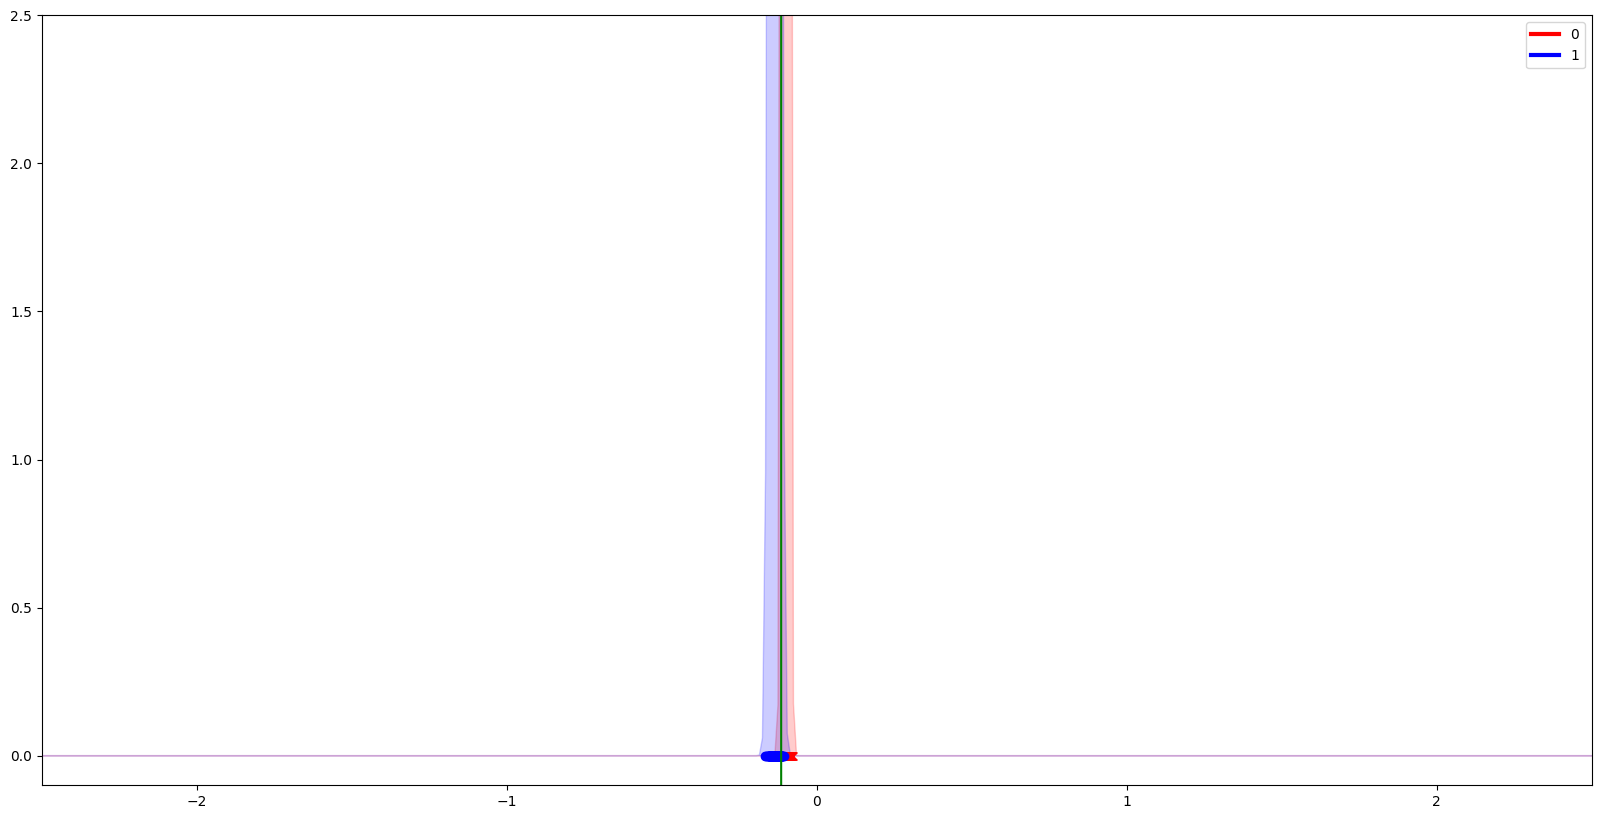

In [19]:
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(20, 10))
plt.ylim(-.1, 2.5)
plt.xlim(-2.5, 2.5)

lines = [Line2D([0], [0], color='red', linewidth=3, linestyle='-'),
        Line2D([0], [0], color='blue', linewidth=3, linestyle='-')]
labels = ['0', '1']
plt.legend(lines, labels)

plt.plot(X_transformed0, np.zeros_like(X_transformed0), 'x', color='red')
plt.plot(X_transformed1, np.zeros_like(X_transformed1), 'o', color='blue')
x_plot = np.linspace(-50, 50, 10000)
y_0 = normal_pdf(x_plot, np.mean(X_transformed0), np.var(X_transformed0))
y_1 = normal_pdf(x_plot, np.mean(X_transformed1), np.var(X_transformed1))
plt.fill_between(x_plot, y_0, color='red', alpha=0.2)
plt.fill_between(x_plot, y_1, color='blue', alpha=0.2)
plt.plot([thresh for x in x_plot], x_plot, color='green')

In [20]:
list=[]
y_pred=X_test.dot(w)
for i in range(len(y_pred)):
    if (y_pred[i]>thresh):
        list.append(0)
    elif (y_pred[i]<thresh):
        list.append(1)
print(list)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [21]:
list1=y_test
print(list1)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [22]:
count=0
t=0
recall = 0
precision = 0
for i in range(len(list)):
    if (list[i]==list1[i]==1):
        count=count+1
        t=t+1
    elif(list[i]==list1[i]==0):
        count=count+1
    elif(list[i] == 1):
        recall = recall +1
    elif(list[i] == 0):
        precision = precision +1 

recall = recall + t
precision = precision +t
print('Accuracy',count/len(y_test))   
print('Recall',t/recall)
print('Precision',t/precision)

Accuracy 0.9878542510121457
Recall 0.9666666666666667
Precision 0.9830508474576272
